In [1]:
import pandas as pd

df1 = pd.read_csv("final_visual.csv")
df2 = pd.read_csv("raw_data.csv")
df3 = pd.read_csv("novel.csv")

In [2]:
df1.rename(columns={'dist_search': 'dist_search_vis', 'link1_change': 'username'}, inplace=True)
df1 = df1[['username', 'stage', 'dist_search_vis']]
df1

,username,stage,dist_search_vis
0,AkaGar,1,0.860
1,GeoffYart,1,0.759
2,bzin22,1,0.662
3,hihms,1,0.001
4,jmamaril25,1,0.010
...,...,...,...
1236,noah-curran,4,0.092
1237,sanjitsama,4,0.544
1238,shivans,4,0.010
1239,viswapurdue,4,0.002


In [3]:
df2.rename(columns={'dist_search': 'dist_search_data', 'user1': 'username'}, inplace=True)
df2 = df2[['username', 'stage', 'dist_search_data']]
df2

,username,stage,dist_search_data
0,mdecloedt,1,1.0
1,Jordan-Loeser,1,1.0
2,LukasMMarinovic,1,0.0
3,whipplem123,1,0.0
4,SionHu,1,0.0
...,...,...,...
426,RafaelCruz15,4,0.0
427,gimg1859,4,0.0
428,jannMorenoJ,4,0.0
429,dahrojasca,4,0.0


In [4]:
df3.rename(columns={'dist_search': 'dist_search_novel', 'user1': 'username'}, inplace=True)
df3 = df3[['username', 'stage', 'dist_search_novel']]
df3

,username,stage,dist_search_novel
0,jmamaril25,1,1.0
1,hihms,1,0.0
2,ko68,1,1.0
3,Nigogu,1,1.0
4,alejosaur,1,1.0
...,...,...,...
102,Anvido,4,0.5
103,Jufcardenasmo,4,0.0
104,federgolo,4,0.6
105,diefrodriguezcha,4,0.0


In [7]:
temp = pd.merge(df1, df2, how = "outer")
df = pd.merge(df3, temp, how = "outer")
df = df.fillna(0)
df.to_csv("cross_section.csv")

In [11]:
spearmancorr = df.corr(method='spearman')
spearmancorr 

,stage,dist_search_novel,dist_search_vis,dist_search_data
stage,1.000000,0.159558,-0.219011,-0.036520
dist_search_novel,0.159558,1.000000,-0.025881,0.304503
dist_search_vis,-0.219011,-0.025881,1.000000,0.116824
dist_search_data,-0.036520,0.304503,0.116824,1.000000


<AxesSubplot:>

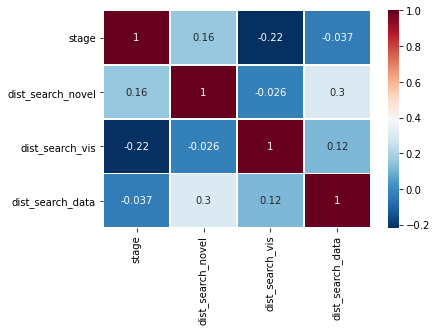

In [14]:
import seaborn as sb

sb.heatmap(spearmancorr, 
            xticklabels=spearmancorr.columns,
            yticklabels=spearmancorr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)